In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### I did the analysis on the distribution of trip duration of yellow taxi using the 2017 Yellow Taxi Trip Data

#### https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs

In [211]:
url = "https://data.cityofnewyork.us/resource/su3p-fcfz.csv"
yellowtaxi = pd.read_csv(url)

In [42]:
url = "https://data.cityofnewyork.us/resource/su3p-fcfz.csv"
taxi = pd.read_csv(url)

In [43]:
taxi.head()

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,vendorid
0,13,0.0,7.0,0.3,0.5,4,1,249,1,N,1.56,0.00,9.36,2017-02-10T06:14:31.000,2017-02-10T06:08:59.000,1.52,2
1,229,0.0,7.5,0.3,0.5,1,1,140,1,N,1.00,0.00,9.30,2017-02-10T06:14:52.000,2017-02-10T06:09:01.000,1.90,1
2,164,0.0,5.5,0.3,0.5,1,2,233,1,N,0.00,0.00,6.30,2017-02-10T06:13:57.000,2017-02-10T06:09:01.000,0.60,1
3,186,0.0,14.0,0.3,0.5,1,1,87,1,N,2.95,0.00,17.75,2017-02-10T06:24:27.000,2017-02-10T06:09:01.000,3.80,1
4,138,0.0,29.5,0.3,0.5,1,1,229,1,N,7.15,5.54,42.99,2017-02-10T06:35:59.000,2017-02-10T06:09:03.000,10.20,1


In [44]:
taxi.columns

Index(['dolocationid', 'extra', 'fare_amount', 'improvement_surcharge',
       'mta_tax', 'passenger_count', 'payment_type', 'pulocationid',
       'ratecodeid', 'store_and_fwd_flag', 'tip_amount', 'tolls_amount',
       'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
       'trip_distance', 'vendorid'],
      dtype='object')

In [51]:
taxi.dropna(inplace=True)
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'])
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi['tpep_dropoff_datetime'])

taxi['trip_duration'] = taxi['tpep_dropoff_datetime'] - taxi['tpep_pickup_datetime']

taxi['trip_duration'] = pd.to_timedelta(taxi['trip_duration'])


In [52]:
taxi['trip_duration_second'] = taxi['trip_duration'].dt.total_seconds().astype(int)

In [53]:
taxi.head()

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,vendorid,trip_duration,trip_duration_second
2,164,0.0,5.5,0.3,0.5,1,2,233,1,N,0.00,0.00,6.30,2017-02-10 06:13:57,2017-02-10 06:09:01,0.6,1,00:04:56,296
3,186,0.0,14.0,0.3,0.5,1,1,87,1,N,2.95,0.00,17.75,2017-02-10 06:24:27,2017-02-10 06:09:01,3.8,1,00:15:26,926
4,138,0.0,29.5,0.3,0.5,1,1,229,1,N,7.15,5.54,42.99,2017-02-10 06:35:59,2017-02-10 06:09:03,10.2,1,00:26:56,1616
5,264,0.0,7.5,0.3,0.5,1,1,264,1,N,1.00,0.00,9.30,2017-02-10 06:16:18,2017-02-10 06:09:03,1.8,1,00:07:15,435
6,244,0.0,24.5,0.3,0.5,1,1,68,1,N,6.30,0.00,31.60,2017-02-10 06:28:16,2017-02-10 06:09:03,8.1,1,00:19:13,1153


In [58]:
#drop the rows that dropoff time is on 02-11
taxi = taxi[taxi['trip_duration_second'] < 80000]

<function matplotlib.pyplot.show>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


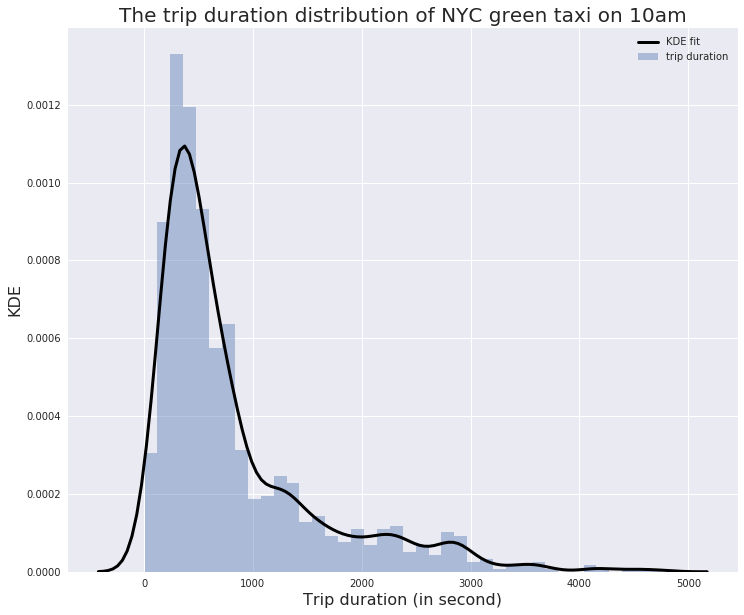

In [75]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.distplot(taxi.trip_duration_second,bins=40,kde_kws={'color':'k','lw':3,'label':'KDE fit'}, label='trip duration')
plt.title("The trip duration distribution of NYC green taxi on 10am", fontsize=20)
plt.xlabel('Trip duration (in second)', fontsize = 16)
plt.ylabel('KDE', fontsize = 16)
plt.legend()
plt.show

figure 1: trip duration distribution of NYC green taxi on 10am in Feb. 10th, 2017. We see the large portion of trip duration is under 1000 seconds.